[ex01] Optymalizacja: wprowadzenie do metod gradientowych
[ μ μ-proj1 ] Zastosuj metodę wielostartową w minimalizacji funkcji Ackleya:
wykonaj optymalizację dla różnych losowych punktów początkowych,
porównaj najlepsze znalezione rozwiązanie po określonej liczbie startów,
zmierz jakość rozwiązania (wartość funkcji celu) oraz czas obliczeń.
zbadaj wpływ liczby uruchomień ("startów") 
n 
n na jakość/dokładność rozwiązania i stabilność wyników; narysuj funkcję 
f^min(n)f^​min​(n).
[ opcj. ] Powtórz cały proces dla funkcji Rastrigina i funkcji Rosenbrocka.

In [6]:
!pip install numpy
!pip install matplotlib scipy

  Using cached scipy-1.15.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached scipy-1.15.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.7 MB)


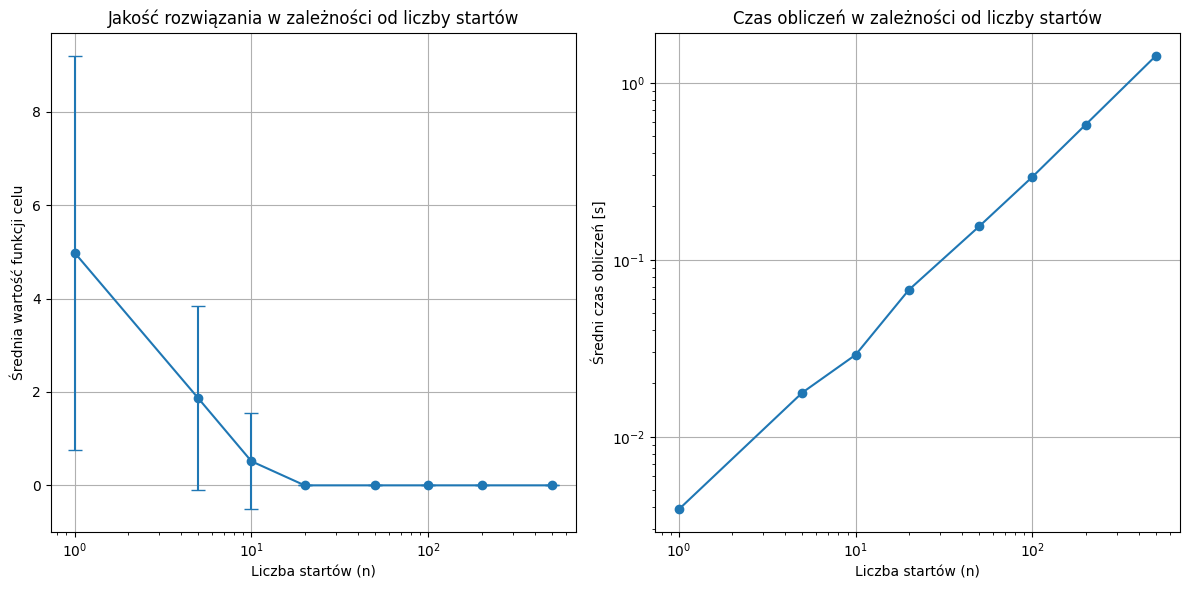

Podsumowanie wyników:
n_starts:   1 | mean_value: 4.986383 ± 4.221437 | mean_time: 0.0039s
n_starts:   5 | mean_value: 1.868515 ± 1.975782 | mean_time: 0.0178s
n_starts:  10 | mean_value: 0.515986 ± 1.031971 | mean_time: 0.0290s
n_starts:  20 | mean_value: 0.000000 ± 0.000000 | mean_time: 0.0676s
n_starts:  50 | mean_value: 0.000000 ± 0.000000 | mean_time: 0.1545s
n_starts: 100 | mean_value: 0.000000 ± 0.000000 | mean_time: 0.2943s
n_starts: 200 | mean_value: 0.000000 ± 0.000000 | mean_time: 0.5804s
n_starts: 500 | mean_value: 0.000000 ± 0.000000 | mean_time: 1.4248s


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.optimize import minimize

# Definicja funkcji Ackleya
def ackley(x, a=20, b=0.2, c=2*np.pi):
    d = len(x)
    sum_sq = np.sum(x**2)
    sum_cos = np.sum(np.cos(c * x))
    term1 = -a * np.exp(-b * np.sqrt(sum_sq/d))
    term2 = -np.exp(sum_cos/d)
    return term1 + term2 + a + np.exp(1)

# Parametry eksperymentu
dim = 2  # Wymiarowość problemu
bounds = [(-5, 5)] * dim  # Zakres poszukiwań dla każdej zmiennej
n_starts_list = [1, 5, 10, 20, 50, 100, 200, 500]  # Lista liczby startów do przetestowania
n_repeats = 10  # Liczba powtórzeń dla każdej liczby startów (dla stabilności wyników)

# Metoda wielostartowa
def multistart_optimization(n_starts, objective_func, bounds, method='L-BFGS-B'):
    best_x = None
    best_value = np.inf
    start_time = time.time()
    
    for _ in range(n_starts):
        # Losowy punkt początkowy w granicach
        x0 = np.random.uniform(low=bounds[0][0], high=bounds[0][1], size=dim)
        
        # Optymalizacja lokalna
        result = minimize(objective_func, x0, bounds=bounds, method=method)
        
        # Aktualizacja najlepszego rozwiązania
        if result.fun < best_value:
            best_value = result.fun
            best_x = result.x
    
    computation_time = time.time() - start_time
    return best_value, computation_time

# Przeprowadzenie eksperymentu
results = {'n_starts': [], 'mean_value': [], 'std_value': [], 'mean_time': []}

for n_starts in n_starts_list:
    values = []
    times = []
    
    for _ in range(n_repeats):
        value, time_taken = multistart_optimization(n_starts, ackley, bounds)
        values.append(value)
        times.append(time_taken)
    
    results['n_starts'].append(n_starts)
    results['mean_value'].append(np.mean(values))
    results['std_value'].append(np.std(values))
    results['mean_time'].append(np.mean(times))

# Wizualizacja wyników
plt.figure(figsize=(12, 6))

# Wykres wartości funkcji celu
plt.subplot(1, 2, 1)
plt.errorbar(results['n_starts'], results['mean_value'], yerr=results['std_value'], 
             fmt='-o', capsize=5)
plt.xscale('log')
plt.xlabel('Liczba startów (n)')
plt.ylabel('Średnia wartość funkcji celu')
plt.title('Jakość rozwiązania w zależności od liczby startów')
plt.grid(True)

# Wykres czasu obliczeń
plt.subplot(1, 2, 2)
plt.plot(results['n_starts'], results['mean_time'], '-o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Liczba startów (n)')
plt.ylabel('Średni czas obliczeń [s]')
plt.title('Czas obliczeń w zależności od liczby startów')
plt.grid(True)

plt.tight_layout()
plt.show()

# Wyświetlenie wyników
print("Podsumowanie wyników:")
for i in range(len(results['n_starts'])):
    print(f"n_starts: {results['n_starts'][i]:3d} | "
          f"mean_value: {results['mean_value'][i]:.6f} ± {results['std_value'][i]:.6f} | "
          f"mean_time: {results['mean_time'][i]:.4f}s")